##  Que tengo que hacer:
Dada una base de datos de magnitudes estelares aparentes y distancias (paralaje), y utilizando las herramientas aprendidas de programación (Python) obtener para cada estrella: a) luminosidades. b) radios. c) temperaturas efectivas.

 y el producto esperado será: -Tabla ASCII con parámetros solicitados. -Construcción de diagrama H-R. -Análisis de estrellas (mínimo 5) a elección: BB, 𝜆max, características. -Presentación de código/script utilizado y trabajo realizado (Máximo 15 minutos). -Todos los grupos deben preguntar

### Resumen
Para la obtención de los parámetros utilizados, considerar los siguientes pasos:
1. Despejar Magnitud abs. de: $m - M =5(Log(d - 1))$, donde m y d son conocidas
2. Despejar Luminsoidad de: $M = M_s - 2.5Log(\frac{L}{L_s})$, $M, M_s y L_s$ son conocidos

~~3. Calculo de Flujo Total: $\frac{\Phi_2}{\Phi_1}= 100^{{m_1-m_2}/5}$ F1 y m1 son el flujo y magnitud aparente del objeto 1, respectivamente. Sugerencia: Usar el Sol. #Esto era el flujo entrante~~

3. Calculo del Flujo Total: $M=M_s - 2.5Log(\frac{Fd^2}{F_sd_s^2})$
4. Calculo de Radios de estrellas: $\Phi = \frac{L}{4\pi R^2}$, $\Phi y L$ son conocidos
5. Cálculo de Temperaturas efectivas: $L = 4\pi R^2 \sigma T_{eff}^4$, $L y R$ son conocidos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Al df original, primero reemplazar todos los prlx = 0 a Nan, y luego quitar todos los Nan?

In [2]:
a = pd.read_excel("data.xls")
df = pd.DataFrame(a) 


for x in df.index:

    if df.loc[x, "parallax"] == 0:
    
        df.loc[x, "parallax"] = np.nan
        
print(df)

         name        ra      dec  vmag  parallax
0     HR 7228  317.1925 -88.9564  5.47       NaN
1     HR 8294  341.3692 -88.8183  6.57       NaN
2     HR 5491  232.0796 -88.1331  6.48       NaN
3     HR 6721  283.6954 -87.6058  5.28       NaN
4     HR 6133  258.9971 -87.5664  6.57       NaN
...       ...       ...      ...   ...       ...
9105  HR 8938  351.7533  87.3075  5.58       NaN
9106  HR 4686  183.8346  87.7000  6.28       NaN
9107   HR 286   23.4600  89.0156  6.46       NaN
9108  HR 7394  259.2367  89.0378  6.38       NaN
9109   HR 424   37.9529  89.2642  2.02     0.007

[9110 rows x 5 columns]


In [ ]:
#df.describe()

In [3]:
dfs = df.dropna() #Data set filtrado, sin valores Nan, eliminando esas filas

print(dfs.to_string())# Ver toda la tabla como string
####print(dfs) #Ver la tabla
#print(dfs["vmag"]) #Referirse a la columna 
#print(dfs.loc[13]) #Referirse a la fila, pero con el índice acorde

         name        ra      dec  vmag  parallax
13    HR 1271   55.6338 -85.2622  6.41     0.008
33    HR 8280  327.7263 -82.7192  5.29     0.011
45    HR 4304  164.8038 -81.5561  6.71     0.010
60    HR 4231  161.3154 -80.4697  5.47     0.003
61    HR 2022   84.2908 -80.4692  5.65     0.044
81     HR 776   37.9188 -79.1094  5.28     0.001
82    HR 2919  111.4083 -79.0942  5.53    -0.002
84    HR 5470  221.9650 -79.0447  3.83     0.029
87    HR 6102  248.3625 -78.8972  3.89     0.056
92    HR 6020  245.0867 -78.6958  4.68     0.020
93    HR 6021  245.1117 -78.6672  5.27     0.020
94    HR 4174  158.8671 -78.6078  4.11     0.009
103   HR 4583  179.9054 -78.2219  4.91     0.012
111   HR 5082  203.3117 -77.5683  6.48     0.034
112   HR 6163  250.7692 -77.5175  4.24     0.034
114   HR 3340  125.1604 -77.4844  4.35     0.036
116   HR 8254  325.3687 -77.3900  3.76     0.053
119     HR 98    6.4379 -77.2542  2.80     0.153
121   HR 9084    0.3988 -77.0658  4.78     0.017
123   HR 8021  316.1

In [ ]:
print(dfs)

In [4]:
a = dfs.to_numpy() # 0 -> name, 1-> ra(en grados), 2-> dec(en grados), 3-> vmag, 4-> parallax

#Vector de datos
name = np.transpose(a[:,[0]]) 
ra = np.transpose(a[:,[1]]) 
dec = np.transpose(a[:,[2]])
vmag = np.transpose(a[:,[3]])
prlx = np.transpose(a[:,[4]])

#1[UA] = 1.496x10^11[m] = 1.496x10^8[Km] = 1.49x10^13[cm] = 4.848x10^-6[pc] = 1.581x10^-5[al]
#1[pc] = 3.086x10^16[m] = 3.086x10^13[Km] = 3.086x10^18[cm] = 206 265[UA] = 3.26[al] 
#1[al] = 9.46x10^15[m] = 9.46x10^12[km] = 9.46x10^17[cm] = 63241[UA] = 0.3066[pc]

#L_sol = 3.84x10^33[erg s^-1] = 3.84x10^26[W]
#R_sol = 6.96x10^10[cm] = 6.96x10^10[m]  
#Phi_sol = 6.31x10^7[W m^-2] = 6.31x10^10[erg cm^-2 s^-1]
#M_sol = +4.74
#m_sol = -26.83

#Cte. de Stefan-Boltzmann = 5.67x10^-8[W m^-2 K^-4] = 5.67x10^-5[erg cm^-2 s^-1 K^-4]

f_sol=6.31*10**7 ##W m^-2
l_sol=3.84*10**26 ##W
r_sol=6.96*10**8 ##meter
t_sol=5777. ##Kelvin
d_sol=4.848*10**-6 #pc
M_sol=4.74
m_sol=-26.83

sigma = 5.67*10**-8 #Cte. Steffan-Boltzmann [W m^-2 K^-4]

#Datos ordenados
name = name[0]
ra = ra[0]
dec = dec[0]
vmag = vmag[0]
prlx = prlx[0]
#Datos derivados
d = np.abs(prlx**-1) #Parsec

#Para ver todo el array
#import sys
#import numpy
#numpy.set_printoptions(threshold=sys.maxsize)
print("Distancia:",d)
print("Vmag (m):",vmag)

Distancia: [125.0 90.90909090909092 100.0 ... 333.3333333333333 90.90909090909092
 142.85714285714286]
Vmag (m): [6.41 5.29 6.71 ... 5.07 6.25 2.02]


In [ ]:
print(name[1264])

In [5]:
def Mag(m,d): #Magnitud absoluta
    return -5*(np.log10(d)-1)+m

mag = Mag(vmag.astype(float),d.astype(float)) # Hay que poner el array.astype(float) porque la funcion np.log10, pide que la variable sea un float
print("M:",mag) #Adimensional

def Lum(M,lsol,Msol): #Luminosidad
    return lsol * 10**((M-Msol)/-2.5)
lum = Lum(mag,l_sol,M_sol)
print("L:",lum) # W

def Flux(M,d): #Flujo total
    return (f_sol*(d_sol**2)*(10**((M-M_sol)/-2.5)))/d**2
flux = Flux(mag,d).astype(float) #Aquí lo mismo
print("Phi:",flux) #W m^-2

def Radius(L,phi): #Radio
    return np.sqrt(L/(4*np.pi*phi))
r = Radius(lum,flux)
print("Radio:",r) #m

def Teff(Luminosidad,radio): #Temperatura efectiva
    return (Luminosidad/(4*np.pi*(radio**2)*sigma))**(1/4)
t = Teff(lum,r)
print("Temperatura:",t)

M: [ 0.92544993  0.49696343  1.71       ... -2.54439373  1.45696343
 -3.7545098 ]
L: [1.28869828e+28 1.91225522e+28 6.25649677e+27 ... 3.14839138e+29
 7.89852240e+27 9.59699226e+29]
Phi: [3.18533110e-06 8.93623501e-06 2.41632074e-06 ... 1.09434582e-05
 3.69108955e-06 1.81616199e-04]
Radio: [1.79429316e+16 1.30494048e+16 1.43543453e+16 ... 4.78478177e+16
 1.30494048e+16 2.05062076e+16]
Temperatura: [2.73774428 3.54317727 2.55501163 ... 3.7272874  2.84048749 7.52303151]


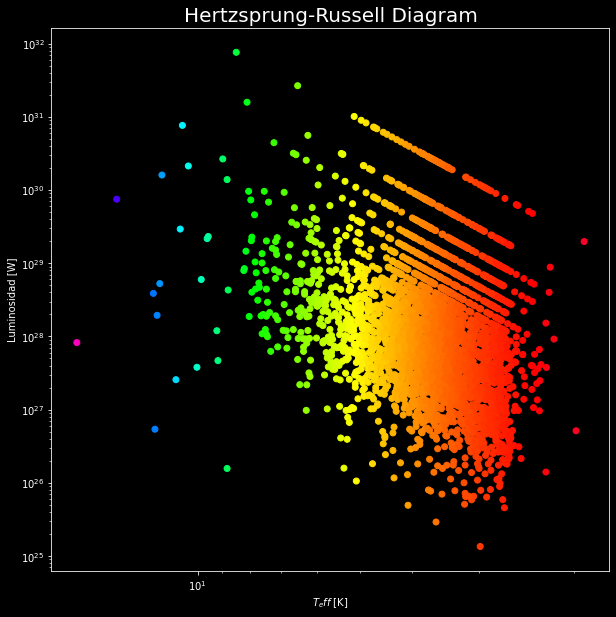

In [7]:
#Diagrama HR

plt.style.use('dark_background')
fig1 = plt.figure(figsize=(10,10))
plt.yscale('log')
plt.xscale('log')
plt.title('Hertzsprung-Russell Diagram',fontsize=20)
plt.xlabel('$T_eff$ [K]')
plt.ylabel('Luminosidad [W]')
#plt.scatter(teff, lum, s=1, c=x ,cmap=plt.get_cmap('RdYlBu'))
#plt.scatter(x, y, s=1, c=x ,cmap=plt.get_cmap('RdYlBu'))
plt.scatter(t, lum,c = t,cmap=plt.get_cmap('gist_rainbow'))
#plt.xlim(xmax=1.8)
#plt.xlim(xmin=1.1)
plt.gca().invert_xaxis()
#plt.savefig("HR3.jpg", dpi=None, facecolor='black', edgecolor='w',
#        orientation='portrait', format=None,
#        transparent=False, bbox_inches=None, pad_inches=0.1)
plt.show()


cmap=plt.get_cmap ("color"):
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'


https://matplotlib.org/stable/tutorials/colors/colormaps.html

#Scatter 
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [ ]:
print(np.log10(100), len(teff), len(lum))

In [ ]:
#Distribución en el cielo
print(ra,dec)
plt.style.use('dark_background')
fig1 = plt.figure(figsize=(10,10))
ax = plt.subplot(2, 1, 1)
plt.title('Stars distribution',fontsize=20,c="w")
plt.xlabel('Ra[deg]')
plt.ylabel('Dec[deg]')
#plt.scatter(teff, lum, s=1, c=x ,cmap=plt.get_cmap('RdYlBu'))
#plt.scatter(x, y, s=1, c=x ,cmap=plt.get_cmap('RdYlBu'))
plt.polar(ra, dec)
#plt.savefig("HR3.jpg", dpi=None, facecolor='black', edgecolor='w',
#        orientation='portrait', format=None,
#        transparent=False, bbox_inches=None, pad_inches=0.1)

ax = plt.subplot(2, 1, 2, projection='polar')

plt.show()


In [ ]:
temp = Teff(Lum_Sol,R_Sol)
#(Lum_Sol/(4*np.pi*R_Sol**2*sigma))**(1/4)
#
print("Temperatura:",temp) #K

In [ ]:
#def Mag(m,d): #Magnitud absoluta
#    return -5*(np.log10(d)-1)+m

#def Lum(M,lsol,Msol): #Luminosidad
#    return lsol * 10**((M-Msol)/-2.5)

#def Flux(M,d): #Flujo total
#    return (f_sol*(d_sol**2)*(10**((M-M_sol)/-2.5)))/d**2

#def Radius(L,phi): #Radio
#    return np.sqrt(L/(4*np.pi*phi))

#def Teff(L,radius): #Temperatura efectiva
#    return (L/(4*np.pi*r**2*sigma))

Mag_Sol = Mag(-26.83,4.84e-6)
print(Mag_Sol)
Lum_Sol = Lum(Mag_Sol,3.84e26,4.74)
print(Lum_Sol)
F_Sol = Flux(Mag_Sol,4.84e-6)
print(F_Sol)
R_Sol = Radius(Lum_Sol,F_Sol)
print(R_Sol)
Tem_Sol = (Lum_Sol/(4*np.pi*(R_Sol**2)*sigma))**(1/4)
print(Tem_Sol)

TemperaturaSolar = Teff(Lum_Sol,R_Sol)
print(TemperaturaSolar)

In [ ]:
#Rigel -> HR 1713
m_rigel = vmag[1264]
d_rigel = d[1264] #pc
M_rigel = Mag(m_rigel,d_rigel)
L_rigel = Lum(M_rigel,l_sol,M_sol)
F_rigel = Flux(M_rigel,d_rigel)
R_rigel = Radius(L_rigel,F_rigel)
T_rigel = Teff(L_rigel,R_rigel)

print(d_rigel)
print(M_rigel) #bien
print(L_rigel) #Bien
print(F_rigel)
print(R_rigel)
print(T_rigel)